In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("census.csv")

In [17]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [54]:
dist_df = pd.concat([df[df.greater_than_50k == 1]
    .groupby('workclass').workclass.count(),
    df[df.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1, sort=False)

In [55]:
dist_df.columns = ["work_class_gt_50k", "work_class_lt_50k"]

In [56]:
dist_df

,work_class_gt_50k,work_class_lt_50k
Federal-gov,371.0,589
Local-gov,617.0,1476
Private,4963.0,17732
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1817
State-gov,353.0,945
Never-worked,NaN,7
Without-pay,NaN,14


In [57]:
dist_calc = dist_df.work_class_gt_50k / (dist_df.work_class_lt_50k + dist_df.work_class_gt_50k)  
dist_calc.sort_values(ascending=False)

 Self-emp-inc        0.557348
 Federal-gov         0.386458
 Local-gov           0.294792
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Private             0.218683
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

Text(0,0.5,'Percentage of People')

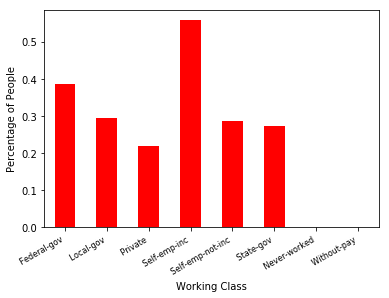

In [58]:
ax = dist_calc.plot(kind="bar", color="r", y="Percentage")
ax.set_xticklabels(dist_calc.index, rotation=30, fontsize=8, ha="right") 
ax.set_xlabel("Working Class")
ax.set_ylabel("Percentage of People")